--- Dimensionality Reduction: PCA Results ---
Original Feature Count: 12
Reduced PCA Shape: (589, 2)
Explained Variance Ratio by each PC: [0.205 0.161]
Cumulative Explained Variance: 0.366


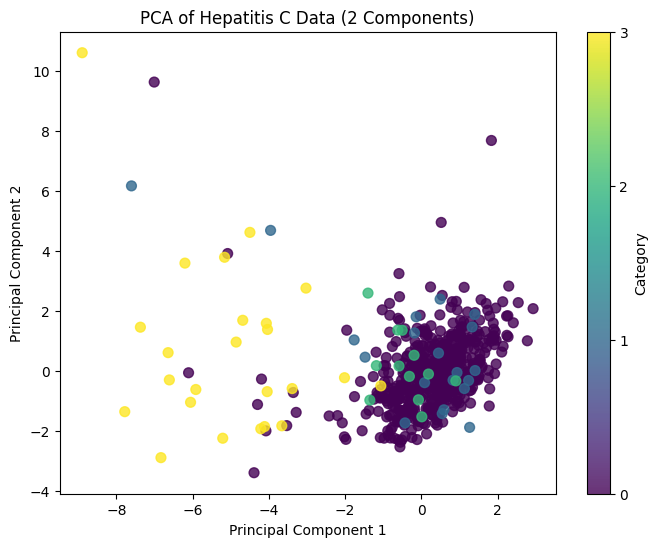


--- Dimensionality Reduction: t-SNE Results ---
Reduced t-SNE Shape: (589, 2)


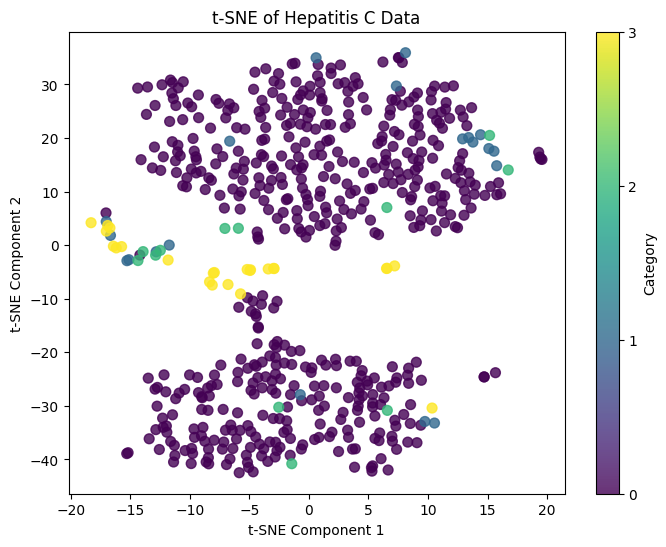

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
try:
    df = pd.read_csv('HepatitisCdata.csv', index_col=0)
except FileNotFoundError:
    print("Please ensure 'HepatitisCdata.csv' is uploaded.")
    exit()

df = df.replace('?', np.nan)
for col in ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']:
    df[col] = pd.to_numeric(df[col])
df = df.dropna()

df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})
# Handle '0s=suspect Blood Donor' by replacing '0s' with '0' before splitting
df['Category'] = df['Category'].str.replace('0s=', '0=').str.split('=').str[0].astype(int)

X = df.drop('Category', axis=1)
y = df['Category']

# Standardize the data is crucial for PCA and t-SNE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 1. Principal Component Analysis (PCA) ---
# Reduce to 2 Principal Components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("--- Dimensionality Reduction: PCA Results ---")
print(f"Original Feature Count: {X_scaled.shape[1]}")
print(f"Reduced PCA Shape: {X_pca.shape}")
print(f"Explained Variance Ratio by each PC: {pca.explained_variance_ratio_.round(3)}")
print(f"Cumulative Explained Variance: {pca.explained_variance_ratio_.sum():.3f}")

# Optional: Plot PCA (Visualization is the key output)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title('PCA of Hepatitis C Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=np.unique(y), label='Category')
plt.show()

# --- 2. t-distributed Stochastic Neighbor Embedding (t-SNE) ---
# Reduce to 2 Components for visualization
# Note: t-SNE is computationally intensive and should ideally be run on smaller datasets
# or after an initial reduction like PCA. Here we run directly on scaled data.
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

print("\n--- Dimensionality Reduction: t-SNE Results ---")
print(f"Reduced t-SNE Shape: {X_tsne.shape}")

# Optional: Plot t-SNE
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title('t-SNE of Hepatitis C Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=np.unique(y), label='Category')